<a href="https://colab.research.google.com/github/progh2/python40projects/blob/main/2022_%ED%8C%8C%EC%9D%B4%EC%8D%AC40%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%B1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00.소개
![책표지](https://bookthumb-phinf.pstatic.net/cover/219/828/21982844.jpg?type=m140&udate=20220221)

* [(만들면서 배우는) 파이썬과 40개의 작품들 ](https://book.naver.com/bookdb/book_detail.naver?bid=21982844)
소스 실습 모음입니다. 
* 2022년도 컴퓨터과학 교양서 한 달 한 권 책 읽기 모임 4월~5월 읽기 도서입니다.
* 아래 코드에는 책 내용의 코드를 코랩에서 동작할 수 있도록 수정된 부분이 있습니다.
* Colab 주소: https://colab.research.google.com/drive/1puAcdT3xjzBEtxE3g3H1D3TAy0yUP97R?usp=sharing
* Github 주소: https://github.com/progh2/python40projects

# 01.숫자 맞추기 게임 만들기

In [ ]:
import random

random_number = random.randint(1, 100)
# print(random_number)

game_count = 1

while True:
  try:
    my_number = int(input("1~100 사이의 숫자를 입력하세요: "))
    if my_number > random_number:
      print("다운")
    elif my_number < random_number:
      print("업")
    elif my_number == random_number:
      print(f"축하합니다. {game_count}회 만에 맞추었습니다.")
      break
    
    game_count = game_count + 1
  except:
    print("에러가 발생했습니다. 숫자만 입력하세요")


1~100 사이의 숫자를 입력하세요: 1
업
1~100 사이의 숫자를 입력하세요: 50
다운
1~100 사이의 숫자를 입력하세요: 25
다운
1~100 사이의 숫자를 입력하세요: 15
업
1~100 사이의 숫자를 입력하세요: 19
업
1~100 사이의 숫자를 입력하세요: 20
축하합니다. 6회 만에 맞추었습니다.


# 02.컴퓨터 외부 및 내부 IP 확인하기

## 내부, 외부 IP 한 번에 출력하는 코드(p.85)

In [ ]:
# main2-4.py
import socket
import requests
import re


in_addr = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
in_addr.connect(("www.google.co.kr", 443))
print("내부 IP: ", in_addr.getsockname()[0])

# 책의 original code. 하지만 코랩에서는 ipconfig.kr이 동작하지 않는다.
#req = requests.get("http://ipconfig.kr/")  
# 에러가 한글이 깨져서 나오는데 이를 출력하기위한 코드
#req.raise_for_status()
#req.encoding="EUC-KR"
#print(req.text)
#out_addr = re.search(r'IP Address : (\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})', req.text)[1]

# 코랩에서도 외부 아이피를 알기 위한 변경된 코드
req = requests.get("https://www.myip.com/")   
# <span id="ip">34.73.104.121</span> 와 같은 식으로 나타내기 때문에 이를 추출하도록 패턴 변경
out_addr = re.search(r'<span id="ip">(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})</span>', req.text)[1]
print("외부 IP: ", out_addr)


내부 IP:  172.28.0.2
외부 IP:  35.237.22.158


# 03.텍스트를 음성으로 변환하기

## 사전 필요 라이브러리 설치
* gtts : 문자를 음성으로 변환해주는 라이브러리
* playsound : 사운드 재생 라이브러리. (하지만 코랩에서는 동작하지 않는다!!)


In [ ]:
!pip install gtts
!pip install playsound

## 코랩에서 사운드 재생하기
코랩에서는 playsound가 동작하지 않는다.
대신 Audio 라이브러리를 사용해서 재생할 수 있도록 가능하다. 
- 참고 링크1 : https://jimmy-ai.tistory.com/25 
- 참고 링크2 : https://colab.research.google.com/drive/1--xY78_ZTFwpI7F2ZfaeyFKiAOG2nkwd#scrollTo=mJr7MDls3RIe

## gTTS로 글자 재생하기

In [ ]:
# main3-1.py
from gtts import gTTS
from IPython.display import Audio 

text = "안녕하세요. 파이썬과 40개의 작품들입니다."
tts = gTTS(text=text, lang='ko')
tts.save(r"hi.mp3")
display(Audio('hi.mp3', autoplay=True))

## 텍스트를 음성으로 변환, 재생하기

In [ ]:
# main3-3.py
from gtts import gTTS
from IPython.display import Audio 

!rm 나의텍스트.txt 2> /dev/null
!wget "https://gist.githubusercontent.com/progh2/74bbc3670ce5221d88049551ec4ce2a2/raw/2b567a9f2e9f3233b45b0819703c657ced01aa0f/%25EB%2582%2598%25EC%259D%2598%25ED%2585%258D%25EC%258A%25A4%25ED%258A%25B8.txt" -c "나의텍스트.txt"
file_path = r'나의텍스트.txt'
with open(file_path, 'rt', encoding='UTF8') as f:
  read_file = f.read()
tts = gTTS(text=read_file, lang='ko')
tts.save(r"나의텍스트.mp3")
display(Audio('나의텍스트.mp3', autoplay=True))

rm: cannot remove 'file_path': No such file or directory
--2022-04-27 04:06:55--  https://gist.githubusercontent.com/progh2/74bbc3670ce5221d88049551ec4ce2a2/raw/2b567a9f2e9f3233b45b0819703c657ced01aa0f/%25EB%2582%2598%25EC%259D%2598%25ED%2585%258D%25EC%258A%25A4%25ED%258A%25B8.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97 [text/plain]
Saving to: ‘나의텍스트.txt’

나의텍스트.txt      100%[===================>]      97  --.-KB/s    in 0s      

2022-04-27 04:06:55 (5.25 MB/s) - ‘나의텍스트.txt’ saved [97/97]

--2022-04-27 04:06:55--  http://file_path/
Resolving file_path (file_path)... failed: Name or service not known.
wget: unable to resolve host address ‘file_path’
FINISHED --2022-04-27 04:06:55--
Total wall clock time: 0.2s
Downloaded: 1 files, 97 in 0s (5.2

# 04.QR코드 생성기
- https://pypi.org/project/qrcode/

## QR코드 라이브러리 설치

In [ ]:
!pip install qrcode

     |████████████████████████████████| 43 kB 929 kB/s 
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40402 sha256=a7866fb87ecd3ed4dfffe574aef374577a5702c5f8b7cb723af67c9bdfc9daff
  Stored in directory: /root/.cache/pip/wheels/93/d7/39/a4111be2cfb8e679938aa671a37888b6afb1f9e7d748e94492
Successfully built qrcode


## url 기반 QR코드 생성 및 실행

In [ ]:
import qrcode

qr_data="www.naver.com"
qr_img = qrcode.make(qr_data)
save_path = qr_data + ".png"
qr_img.save(save_path)

## 만들어진 이미지 출력

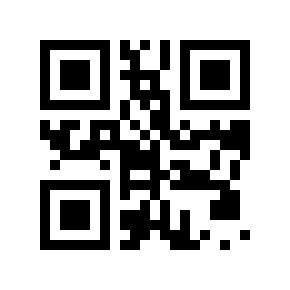

In [ ]:
from IPython.display import Image
Image(save_path)

## 여러 개의 QR코드를 한번에 생성

In [ ]:
# main4-2.py
from IPython.display import Image

file_path=r"qr코드모음.txt"
!rm qr코드모음.txt 2> /dev/null
!wget "https://gist.githubusercontent.com/progh2/4a4465b441786dc4d797d7e2ae33696e/raw/c23db9c4263e3d6e085677846d71ddcb6664f0d2/qr%25EC%25BD%2594%25EB%2593%259C%25EB%25AA%25A8%25EC%259D%258C.txt" 
with open(file_path, 'rt', encoding='UTF8') as f:
  read_lines = f.readlines()
  for idx, line in enumerate(read_lines):
    line = line.strip()
    print(line)

    qr_data = line
    qr_img = qrcode.make(qr_data)
    save_path= 'qr'+ str(idx + 1) + '.png'
    !rm save_path 2>/dev/null
    qr_img.save(save_path)
    Image(save_path)
    
  

--2022-04-27 04:31:30--  https://gist.githubusercontent.com/progh2/4a4465b441786dc4d797d7e2ae33696e/raw/c23db9c4263e3d6e085677846d71ddcb6664f0d2/qr%25EC%25BD%2594%25EB%2593%259C%25EB%25AA%25A8%25EC%259D%258C.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73 [text/plain]
Saving to: ‘qr코드모음.txt’

qr코드모음.txt      100%[===================>]      73  --.-KB/s    in 0s      

2022-04-27 04:31:30 (3.26 MB/s) - ‘qr코드모음.txt’ saved [73/73]

www.naver.com
www.google.com
www.daum.net
www.daduino.co.kr
www.nate.com


## 여러개의 이미지 파일을 찾아서 한번에 출력하기
- 참고 : https://blog.daum.net/geoscience/1263

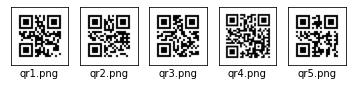

In [ ]:
import matplotlib.pyplot as plt
import glob
import cv2

fig = plt.figure()
rows = 1
cols = 5
i = 1
qrfiles = glob.glob("qr*.png")
qrfiles.sort()
for filename in qrfiles:
  img = cv2.imread(filename)
  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax.set_xlabel(filename)
  ax.set_xticks([]), ax.set_yticks([])
  i += 1

# 05.컴퓨터의 정보 확인

## 라이브러리 설치
- psutil : 컴퓨터 정보 확인 라이브러리

In [ ]:
!pip install psutil

## 컴퓨터 정보 확인

In [ ]:
import psutil

cpu = psutil.cpu_freq()
print(cpu)

cpu_core = psutil.cpu_count(logical=False)
print(cpu_core)

memory = psutil.virtual_memory()
print(memory)

disk = psutil.disk_partitions()
print(disk)

net = psutil.net_io_counters()
print(net)

None
1
svmem(total=13622190080, available=12490137600, percent=8.3, used=920809472, free=10746232832, active=1292206080, inactive=1374900224, buffers=109473792, cached=1845673984, shared=1212416, slab=133054464)
[sdiskpart(device='/dev/root', mountpoint='/sbin/docker-init', fstype='ext2', opts='ro,relatime'), sdiskpart(device='/dev/sda1', mountpoint='/etc/resolv.conf', fstype='ext4', opts='rw,nosuid,nodev,relatime,commit=30'), sdiskpart(device='/dev/sda1', mountpoint='/etc/hostname', fstype='ext4', opts='rw,nosuid,nodev,relatime,commit=30'), sdiskpart(device='/dev/sda1', mountpoint='/etc/hosts', fstype='ext4', opts='rw,nosuid,nodev,relatime,commit=30')]
snetio(bytes_sent=1779475, bytes_recv=2114257, packets_sent=5615, packets_recv=5988, errin=0, errout=0, dropin=0, dropout=0)


## 필요한 정보만 출력

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   39G   70G  36% /
tmpfs            64M  4.0K   64M   1% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  812M  59% /sbin/docker-init
tmpfs           6.4G   32K  6.4G   1% /var/colab
/dev/sda1        81G   43G   39G  53% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
import psutil

cpu = psutil.cpu_freq()
if cpu != None:     # colab에서는 cpu_freq 측정이 동작하지 않는다.
  cpu_current_ghz = round(cpu.current / 1000, 2)
  print(f"cpu 속도 : {cpu_current_ghz}GHz")
else:
  print("cpu 속도 측정 불가")

cpu_core = psutil.cpu_count(logical=False)
print(f"코어: {cpu_core}개")

memory = psutil.virtual_memory()
memory_total = round(memory.total / 1024**3)
print(f"메모리: {memory_total}GB")

disk = psutil.disk_partitions()
for p in disk:
  print(p.mountpoint, p.fstype, end=' ')
  du = psutil.disk_usage(p.mountpoint)
  disk_total = round(du.total / 1024**3)
  print(f"디스크 크기: {disk_total}GB")

net = psutil.net_io_counters()
sent = round(net.bytes_sent/1024**2, 1)
recv = round(net.bytes_recv/1024**2, 1)
print(f"보내기: {sent}MB / 받기: {recv}MB")

cpu 속도 측정 불가
코어: 1개
메모리: 13GB
/sbin/docker-init ext2 디스크 크기: 2GB
/etc/resolv.conf ext4 디스크 크기: 81GB
/etc/hostname ext4 디스크 크기: 81GB
/etc/hosts ext4 디스크 크기: 81GB
보내기: 10.1MB / 받기: 10.9MB


코랩의 도커 환경이나 맥 등에서는 올바르지 않는 결과가 출력되는 것으로 보인다. `df -h`를 호출했을 때의 처리가 다른 것 같다.

## 1초당 반복해서 출력하는 코드

In [ ]:
import psutil


curr_sent = 0
curr_recv = 0
prev_sent = 0
prev_recv = 0

def cpuinfo():
  cpu_p = psutil.cpu_percent(interval=1)
  print(f"CPU사용량: {cpu_p}%")

  cpu = psutil.cpu_freq()
  if cpu != None:     # colab에서는 cpu_freq 측정이 동작하지 않는다.
    cpu_current_ghz = round(cpu.current / 1000, 2)
    print(f"cpu 속도 : {cpu_current_ghz}GHz")
  else:
    print("cpu 속도 측정 불가")

  cpu_core = psutil.cpu_count(logical=False)
  print(f"코어: {cpu_core}개")

def meminfo():
  memory = psutil.virtual_memory()
  memory_total = round(memory.total / 1024**3)
  print(f"메모리: {memory_total}GB")

def netinfo():
  global curr_sent, curr_recv, prev_sent, prev_recv
  net = psutil.net_io_counters()
  cur_sent = round(net.bytes_sent/1024**2, 1)
  cur_recv = round(net.bytes_recv/1024**2, 1)
  sent = round(curr_sent - prev_sent, 1)
  recv = round(curr_recv - prev_recv, 1)  
  print(f"보내기: {sent}MB / 받기: {recv}MB")
  prev_sent = curr_sent
  prev_recv = curr_recv

def dskinfo():
  disk = psutil.disk_partitions()
  for p in disk:
    print(p.mountpoint, p.fstype, end=' ')
    du = psutil.disk_usage(p.mountpoint)
    disk_total = round(du.total / 1024**3)
    print(f"디스크 크기: {disk_total}GB")

count = 0
while count < 5:
  cpuinfo()
  meminfo()
  dskinfo()
  netinfo()
  print("-------------")
  print()
  count = count + 1


CPU사용량: 14.0%
cpu 속도 측정 불가
코어: 1개
메모리: 13GB
/sbin/docker-init ext2 디스크 크기: 2GB
/etc/resolv.conf ext4 디스크 크기: 81GB
/etc/hostname ext4 디스크 크기: 81GB
/etc/hosts ext4 디스크 크기: 81GB
보내기: 0MB / 받기: 0MB
-------------

CPU사용량: 2.5%
cpu 속도 측정 불가
코어: 1개
메모리: 13GB
/sbin/docker-init ext2 디스크 크기: 2GB
/etc/resolv.conf ext4 디스크 크기: 81GB
/etc/hostname ext4 디스크 크기: 81GB
/etc/hosts ext4 디스크 크기: 81GB
보내기: 0MB / 받기: 0MB
-------------

CPU사용량: 7.0%
cpu 속도 측정 불가
코어: 1개
메모리: 13GB
/sbin/docker-init ext2 디스크 크기: 2GB
/etc/resolv.conf ext4 디스크 크기: 81GB
/etc/hostname ext4 디스크 크기: 81GB
/etc/hosts ext4 디스크 크기: 81GB
보내기: 0MB / 받기: 0MB
-------------

CPU사용량: 8.5%
cpu 속도 측정 불가
코어: 1개
메모리: 13GB
/sbin/docker-init ext2 디스크 크기: 2GB
/etc/resolv.conf ext4 디스크 크기: 81GB
/etc/hostname ext4 디스크 크기: 81GB
/etc/hosts ext4 디스크 크기: 81GB
보내기: 0MB / 받기: 0MB
-------------

CPU사용량: 3.0%
cpu 속도 측정 불가
코어: 1개
메모리: 13GB
/sbin/docker-init ext2 디스크 크기: 2GB
/etc/resolv.conf ext4 디스크 크기: 81GB
/etc/hostname ext4 디스크 크기: 81GB
/etc/hosts ext4 디스크 크기

# 06.압축파일 암호 푸는 프로그램

In [ ]:
!rm 젤다의전설주인공.zip 2>/dev/Null
!wget "https://github.com/progh2/python40projects/raw/gh-pages/%EC%A0%A4%EB%8B%A4%EC%9D%98%EC%A0%84%EC%84%A4%EC%A3%BC%EC%9D%B8%EA%B3%B5.zip"


--2022-04-29 04:54:25--  https://github.com/progh2/python40projects/raw/gh-pages/%EC%A0%A4%EB%8B%A4%EC%9D%98%EC%A0%84%EC%84%A4%EC%A3%BC%EC%9D%B8%EA%B3%B5.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/progh2/python40projects/gh-pages/%EC%A0%A4%EB%8B%A4%EC%9D%98%EC%A0%84%EC%84%A4%EC%A3%BC%EC%9D%B8%EA%B3%B5.zip [following]
--2022-04-29 04:54:26--  https://raw.githubusercontent.com/progh2/python40projects/gh-pages/%EC%A0%A4%EB%8B%A4%EC%9D%98%EC%A0%84%EC%84%A4%EC%A3%BC%EC%9D%B8%EA%B3%B5.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 301 [application/zip]
Saving to: ‘젤다의전설주인공.zip’

젤다의전설주인공

In [ ]:
import itertools

passwd_string="0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"

for len in range(1,5):
  to_attempt = itertools.product(passwd_string, repeat = len)
  for attempt in to_attempt:
    passwd = ''.join(attempt)
    #print(passwd)

In [ ]:
import itertools
import zipfile


#passwd_string="0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
passwd_string="adelz"
zFile = zipfile.ZipFile(r"젤다의전설주인공.zip")

for len in range(5,6):
  to_attempt = itertools.product(passwd_string, repeat = len)
  for attempt in to_attempt:
    passwd = "".join(attempt)    
    print(passwd, end='')
    try:
      zFile.extractall(pwd = passwd.encode())
      print(f"비밀번호는 {passwd}입니다.")
      break;
    except:
      print("..No! ")
      pass

aaaaa..No! 
aaaad..No! 
aaaae..No! 
aaaal..No! 
aaaaz..No! 
aaada..No! 
aaadd..No! 
aaade..No! 
aaadl..No! 
aaadz..No! 
aaaea..No! 
aaaed..No! 
aaaee..No! 
aaael..No! 
aaaez..No! 
aaala..No! 
aaald..No! 
aaale..No! 
aaall..No! 
aaalz..No! 
aaaza..No! 
aaazd..No! 
aaaze..No! 
aaazl..No! 
aaazz..No! 
aadaa..No! 
aadad..No! 
aadae..No! 
aadal..No! 
aadaz..No! 
aadda..No! 
aaddd..No! 
aadde..No! 
aaddl..No! 
aaddz..No! 
aadea..No! 
aaded..No! 
aadee..No! 
aadel..No! 
aadez..No! 
aadla..No! 
aadld..No! 
aadle..No! 
aadll..No! 
aadlz..No! 
aadza..No! 
aadzd..No! 
aadze..No! 
aadzl..No! 
aadzz..No! 
aaeaa..No! 
aaead..No! 
aaeae..No! 
aaeal..No! 
aaeaz..No! 
aaeda..No! 
aaedd..No! 
aaede..No! 
aaedl..No! 
aaedz..No! 
aaeea..No! 
aaeed..No! 
aaeee..No! 
aaeel..No! 
aaeez..No! 
aaela..No! 
aaeld..No! 
aaele..No! 
aaell..No! 
aaelz..No! 
aaeza..No! 
aaezd..No! 
aaeze..No! 
aaezl..No! 
aaezz..No! 
aalaa..No! 
aalad..No! 
aalae..No! 
aalal..No! 
aalaz..No! 
aalda..No! 
aaldd..No! 
aalde..No! 
aald

## 비밀번호를 찾으면 프로그래밍 종료되는 코드 만들고 실행

In [ ]:
import itertools
import zipfile


def un_zip(passwd_string, min_len, max_len, zFile):
  for len in range(min_len,max_len + 1):
    to_attempt = itertools.product(passwd_string, repeat = len)
    for attempt in to_attempt:
      passwd = "".join(attempt)    
      print(passwd, end='')
      try:
        zFile.extractall(pwd = passwd.encode())
        print(f"--!!! 비밀번호는 {passwd}입니다.")
        return True
      except:
        print("..No! ")
        pass
  return False


#passwd_string="0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
passwd_string="adelz"
zFile = zipfile.ZipFile(r"젤다의전설주인공.zip")
min_len = 1
max_len = 5
unzip_result = un_zip(passwd_string, min_len, max_len, zFile)

if unzip_result :
  print("암호 찾기에 성공했습니다.")
else:
  print("암호 찾기에 실패했습니다.")

  

a..No! 
d..No! 
e..No! 
l..No! 
z..No! 
aa..No! 
ad..No! 
ae..No! 
al..No! 
az..No! 
da..No! 
dd..No! 
de..No! 
dl..No! 
dz..No! 
ea..No! 
ed..No! 
ee..No! 
el..No! 
ez..No! 
la..No! 
ld..No! 
le..No! 
ll..No! 
lz..No! 
za..No! 
zd..No! 
ze..No! 
zl..No! 
zz..No! 
aaa..No! 
aad..No! 
aae..No! 
aal..No! 
aaz..No! 
ada..No! 
add..No! 
ade..No! 
adl..No! 
adz..No! 
aea..No! 
aed..No! 
aee..No! 
ael..No! 
aez..No! 
ala..No! 
ald..No! 
ale..No! 
all..No! 
alz..No! 
aza..No! 
azd..No! 
aze..No! 
azl..No! 
azz..No! 
daa..No! 
dad..No! 
dae..No! 
dal..No! 
daz..No! 
dda..No! 
ddd..No! 
dde..No! 
ddl..No! 
ddz..No! 
dea..No! 
ded..No! 
dee..No! 
del..No! 
dez..No! 
dla..No! 
dld..No! 
dle..No! 
dll..No! 
dlz..No! 
dza..No! 
dzd..No! 
dze..No! 
dzl..No! 
dzz..No! 
eaa..No! 
ead..No! 
eae..No! 
eal..No! 
eaz..No! 
eda..No! 
edd..No! 
ede..No! 
edl..No! 
edz..No! 
eea..No! 
eed..No! 
eee..No! 
eel..No! 
eez..No! 
ela..No! 
eld..No! 
ele..No! 
ell..No! 
elz..No! 
eza..No! 
ezd..No! 
eze..No! 
ezl..

# 07.환율 변환기

## 라이브러리 설치
- currencyconvertor : 환율 변환 라이브러리

In [ ]:
!pip install currencyconverter

     |████████████████████████████████| 544 kB 4.1 MB/s 


## 지원하는 통화목록 출력 코드 만들기

In [ ]:
from currency_converter import CurrencyConverter
cc = CurrencyConverter()
print(cc.currencies)

{'TRY', 'PLN', 'HRK', 'ZAR', 'RON', 'HUF', 'MXN', 'THB', 'SIT', 'AUD', 'IDR', 'ILS', 'CHF', 'LVL', 'ROL', 'DKK', 'ISK', 'INR', 'BGN', 'KRW', 'GBP', 'SGD', 'JPY', 'LTL', 'NZD', 'MTL', 'CYP', 'MYR', 'NOK', 'RUB', 'SEK', 'BRL', 'CNY', 'EUR', 'PHP', 'CAD', 'TRL', 'USD', 'CZK', 'HKD', 'SKK', 'EEK'}


## 1달러를 원화로 변환한 결과 출력 코드 만들기

In [ ]:
from currency_converter import CurrencyConverter
cc = CurrencyConverter("https://www.ecb.europa.eu/stats/eurofxref/eurofxref.zip")
print(cc.convert(1, "USD", "KRW"))


1275.937052932761


실시간 환율 정보 : https://kr.investing.com/currencies/usd-krw

-_- 위 사이트가 학교에서는 막혀있다.하지만 코랩 서버에서는 접근 가능하니 아래 코드 실행이 가능하다.


## 실시간 환율 정보 크롤링 코드 만들기

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_exchange_rate(target1, target2):
  headers = {
      'User-Agents' : 'Mozilla/5.0',
      'Content-Type' : 'text/html; charset=utf-8'
  }

  response = requests.get("https://kr.investing.com/currencies/{}-{}-converter".format(target1, target2), headers=headers)
  content = BeautifulSoup(response.content, "html.parser")
  #print(content)
  containers = content.find("span", {'id':'last_last'})
  print(containers.text)

get_exchange_rate('usd', 'krw')
get_exchange_rate('jpy', 'krw')

1,258.49
9.6572


# 99.코랩에 Python 패키지 영구 저장 방법
- 출처 : [심미란 선생님 코랩](https://colab.research.google.com/drive/1O-Dzd7-QPT8EHL_3Jxt3Hcrlu6eCdrdo?usp=sharing#scrollTo=L38g2vrHeAx2)
- 레퍼런스 : [Google Colab에서 python 패키지를 영구적(permanently)으로 설치하는 방법](https://teddylee777.github.io/colab/colab%EC%97%90%EC%84%9C-python%ED%8C%A8%ED%82%A4%EC%A7%80%EB%A5%BC-permanently-%EC%9D%B8%EC%8A%A4%ED%86%A8%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95)

## 패키지 설치
최초 1번만 설치하고 싶다면 아래 부분에 해당 라이브러리 설치 코드 넣는다.

In [ ]:
# colab 세션을 열거나 재시작할 때 마다 실행하면, 내가 추가로 설치한 파이썬 패키지를 매번 다시 설치할 필요없이 로드한다.
# 단, 이 코드를 실행하지 않으면 패키지가 import 안됨.
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 폴더 안에 미리 만들어 놓은 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

# 사용법 - 설치 후 "패키지 불러오는 법"의 코드를 실행해야만 해당 모듈이 불러와짐에 주의
# !pip install --target=$my_path gtts       # 설치할 때만 한 번 실행, /Colab Notebooks/my_env 폴더 안에 인스톨
# !pip install --target=$my_path playsound  # 설치할 때만 한 번 실행, /Colab Notebooks/my_env 폴더 안에 인스톨


Mounted at /content/drive


## 패키지 불러오는 법
새로운 Colab 세션을 열거나, 재시작할 때 반드시 아래 코드 실행

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)